<div style="width: 90%; height: 100px; background-color: #3867d6; border: 3px solid #4b7bec; text-align: center; line-height: 100px; color: #FFFFFF; font-size: 24px; font-weight: bold; border-radius:6px;">
   Hand written digit detection Using TensorFlow | CNN
</div>

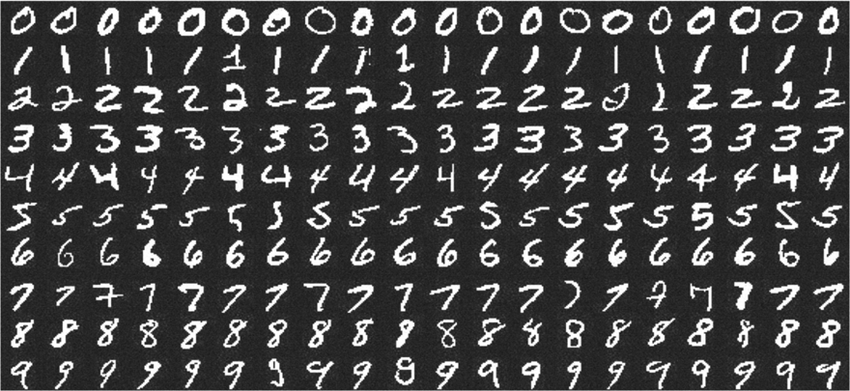

<div style="width: 90%; background-color: #3867d6; color: white; padding: 20px; border: 3px solid #4b7bec; margin-bottom: 20px;border-radius:10px;">
<h3 style="color: #FFF;">Introduction</h3>
    <span style="color: #FFF;">In this project, we dive into detecting hand writting digits using Convolutional Neural Networks. Our goal in this project is to build and train an acurate CNN model to classify differnet hand written numbers and put labels on them.
<br>
In this notebook we try to create a simple model structure that has very low run time.
<br>
<br>
        Created by : AmirHossein Mirzaei    |    Decemeber 2023
</span> 
    <h3 style="color: #FFF;">Tasks in this project</h3>
    <ul style="list-style-type: none; padding-left: 0; color: #FFF;">
        <li><span style="margin-left: -10px;">&#8226;</span> Importing necessary libraries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Importing mnist data</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Building CNN architecture</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Compiling model</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Training model</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Evaluating model performance using F1Score and confusion matrix</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Visualizing model predictions</li>
    </ul>
</div>

## <span style="color: #3867d6;">Importing necessary libraries</span>

In [1]:
!pip install visualkeras

  Obtaining dependency information for aggdraw>=1.3.11 from https://files.pythonhosted.org/packages/da/05/8912c901a3965ec7117d6cc33eaec3888c717611f72ce69d8be62a01d149/aggdraw-1.3.18-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 15.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import visualkeras

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <span style="color: #3867d6;">Importing mnist dataset</span>

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


## <span style="color: #3867d6;">Close look to data and labels</span>

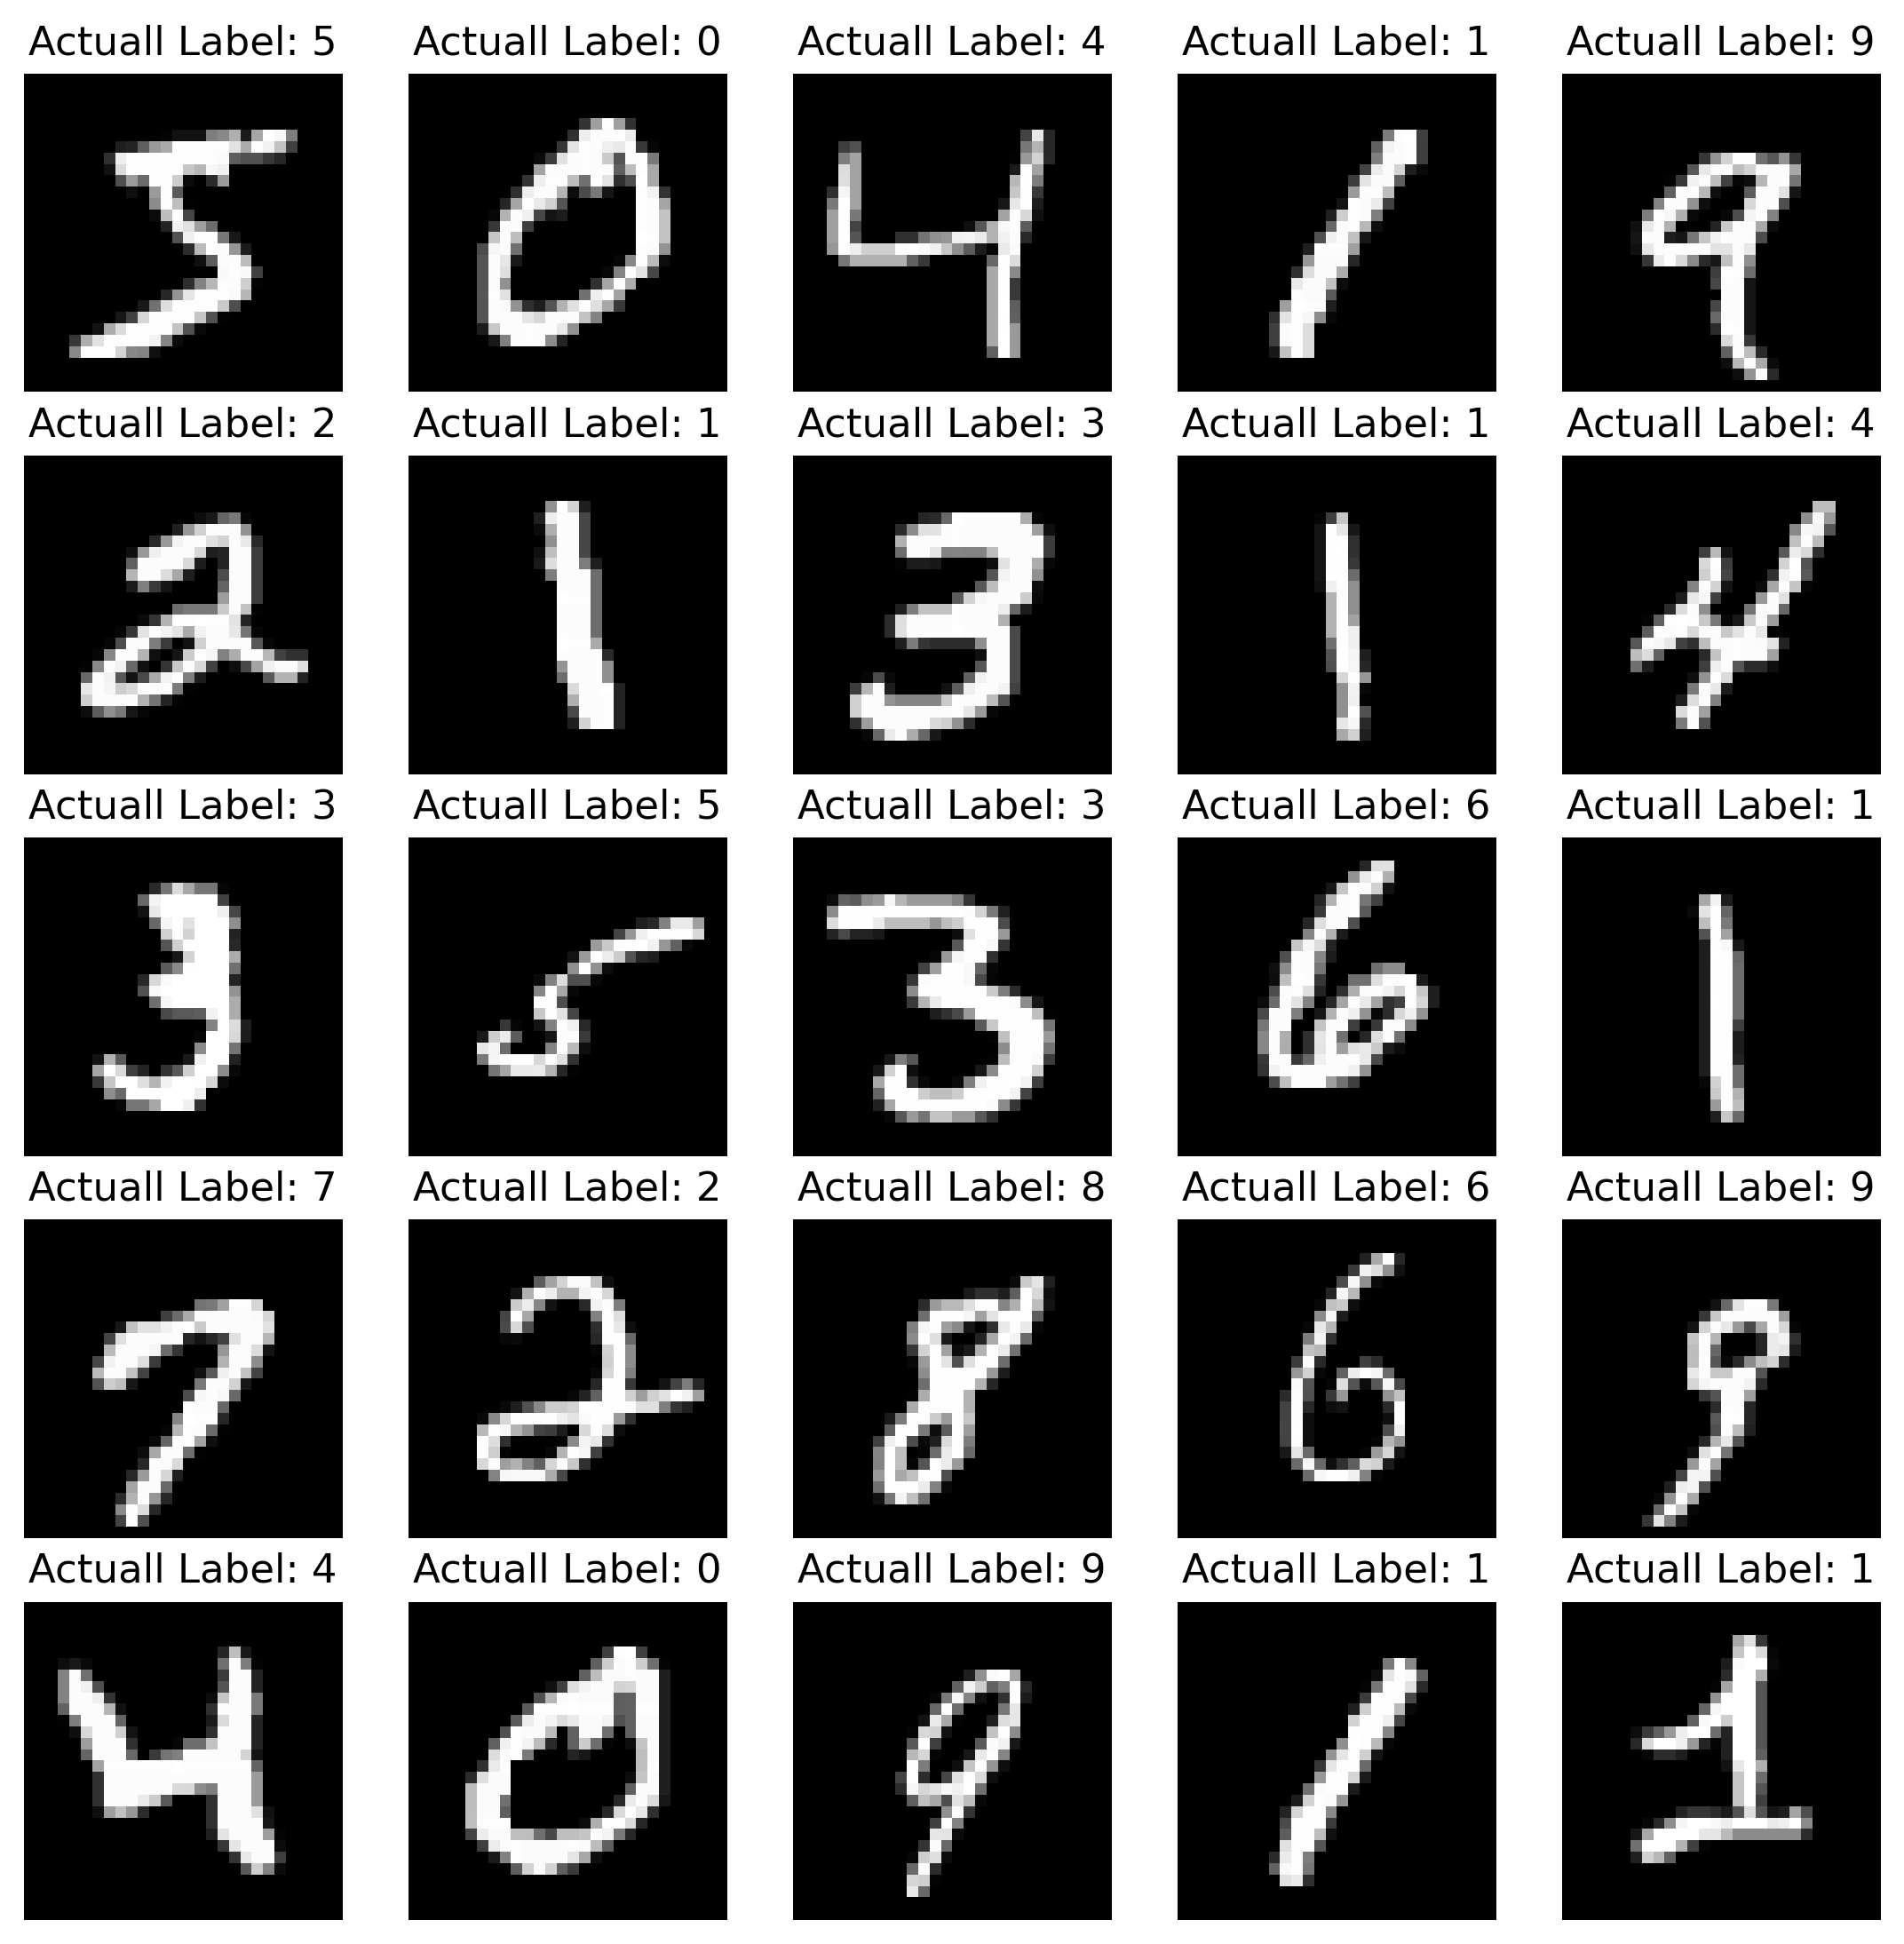

In [4]:
plt.figure(figsize=(10, 10), dpi=270)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actuall Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

## <span style="color: #3867d6;">Define necessary functions for model evaluate</span>

In [5]:
def plot_training_history_with_plotly(history):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['accuracy']) + 1)),
        y=history.history['accuracy'],
        mode='lines',
        name='Train Accuracy'
    ))

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['val_accuracy']) + 1)),
        y=history.history['val_accuracy'],
        mode='lines',
        name='Validation Accuracy'
    ))

    fig.update_layout(
        title='Model Accuracy',
        xaxis_title='Epoch',
        yaxis_title='Accuracy',
        legend=dict(x=0, y=1),
    )

    fig.show()

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['loss']) + 1)),
        y=history.history['loss'],
        mode='lines',
        name='Train Loss'
    ))

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['val_loss']) + 1)),
        y=history.history['val_loss'],
        mode='lines',
        name='Validation Loss'
    ))

    fig.update_layout(
        title='Model Loss',
        xaxis_title='Epoch',
        yaxis_title='Loss',
        legend=dict(x=0, y=1),
    )

    fig.show()

## <span style="color: #3867d6;">Split data into train and test</span>

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## <span style="color: #3867d6;">Modeling</span>

### <span style="color: #3867d6;">Lanet-5</span>

<span>
    LeNet is a CNN structure represented by LeCun in 1998. CNN are a of feed-forward neural network that artificial neurons can respond to a part of the surrounding cells in the coverage range and perform well in large-scale image processing.
</span>

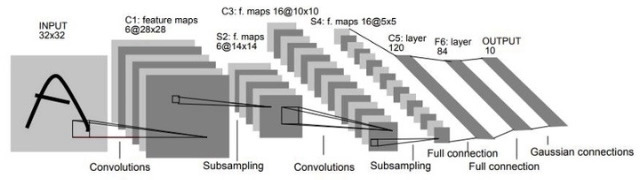

In [7]:
lanet5_model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

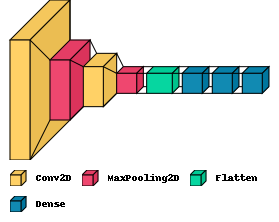

In [8]:
visualkeras.layered_view(lanet5_model, scale_xy=5, legend=True)

In [9]:
lanet5_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lanet5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [10]:
lanet5_history = lanet5_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 13s 4ms/step - loss: 0.2298 - accuracy: 0.9285 - val_loss: 0.0724 - val_accuracy: 0.9755
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0694 - accuracy: 0.9783 - val_loss: 0.0462 - val_accuracy: 0.9862
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0498 - accuracy: 0.9848 - val_loss: 0.0377 - val_accuracy: 0.9878
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0396 - accuracy: 0.9879 - val_loss: 0.0351 - val_accuracy: 0.9881
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0338 - val_accuracy: 0.9892
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.0365 - val_accuracy: 0.9884
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0233 - accuracy: 0.9923 - val_loss: 0.0351 - val_accuracy: 0.9887
Epoch

In [11]:
test_loss, test_acc = lanet5_model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0405 - accuracy: 0.9885
Test accuracy: 0.9884999990463257


In [12]:
plot_training_history_with_plotly(lanet5_history)

### <span style="color: #3867d6;">Second Layer structure</span>

In [13]:
model_2 = models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Dropout(0.25),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Dropout(0.25),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dropout(0.5),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])

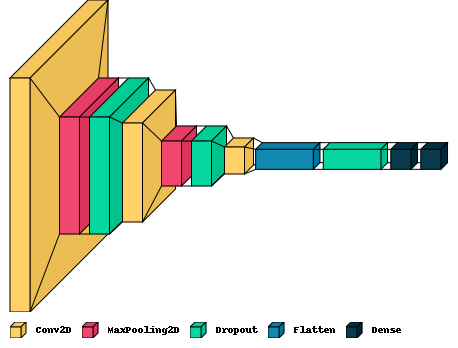

In [14]:
visualkeras.layered_view(model_2, scale_xy=9, legend=True)

In [15]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [16]:
model_2_history = model_2.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10


2023-12-09 18:14:42.194595: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 7s 5ms/step - loss: 0.2934 - accuracy: 0.9071 - val_loss: 0.0539 - val_accuracy: 0.9824
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0935 - accuracy: 0.9710 - val_loss: 0.0370 - val_accuracy: 0.9872
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0695 - accuracy: 0.9787 - val_loss: 0.0289 - val_accuracy: 0.9895
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0612 - accuracy: 0.9808 - val_loss: 0.0270 - val_accuracy: 0.9908
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0554 - accuracy: 0.9830 - val_loss: 0.0262 - val_accuracy: 0.9915
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0514 - accuracy: 0.9843 - val_loss: 0.0236 - val_accuracy: 0.9925
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0468 - accuracy: 0.9855 - val_loss: 0.0220 - val_accuracy: 0.9928
Epoch 8/10
938/93

In [17]:
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0186 - accuracy: 0.9936
Test accuracy: 0.9936000108718872


In [18]:
plot_training_history_with_plotly(model_2_history)

### <span style="color: #3867d6;">Third Layer Structure</span>

In [19]:
model_3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

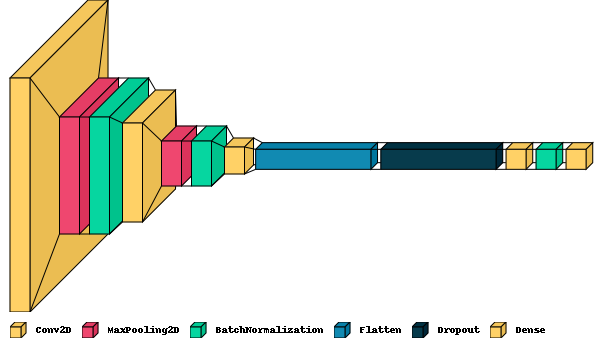

In [20]:
visualkeras.layered_view(model_3, scale_xy=9, legend=True)

In [21]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                      

In [22]:
model_3_history = model_3.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 8s 6ms/step - loss: 0.1263 - accuracy: 0.9604 - val_loss: 0.0469 - val_accuracy: 0.9841
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0513 - accuracy: 0.9836 - val_loss: 0.0391 - val_accuracy: 0.9887
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0393 - accuracy: 0.9880 - val_loss: 0.0280 - val_accuracy: 0.9905
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0318 - accuracy: 0.9894 - val_loss: 0.0244 - val_accuracy: 0.9921
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.0240 - val_accuracy: 0.9926
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0280 - val_accuracy: 0.9912
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0266 - val_accuracy: 0.9923
Epoch 

In [23]:
test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0298 - accuracy: 0.9918
Test accuracy: 0.9918000102043152


In [24]:
plot_training_history_with_plotly(model_3_history)


### <span style="color: #3867d6;">Evaluating model performance | Visualizing results</span>

*After training the model we should see the model performance on unseen test data. The model's evaluation on the test data tells us the real-world performance and the model has successfully learned or not.*

The model's performance on the test data is evaluated using two parameters: **Accuracy** and **Loss**

> An accuracy of approximately `99.4%` shows that the model has learned well from the training data and can apply it to new examples.

In [25]:
predictions = model_3.predict(test_images)

313/313 [==============================] - 1s 2ms/step


### <span style="color: #3867d6;">Confusion Matrix</span>

*Confusion matrix* is a great way to see the models performance. It gives us a visualized tabel of how well the model's predictions predicted the actuall labels for these 10 labels.

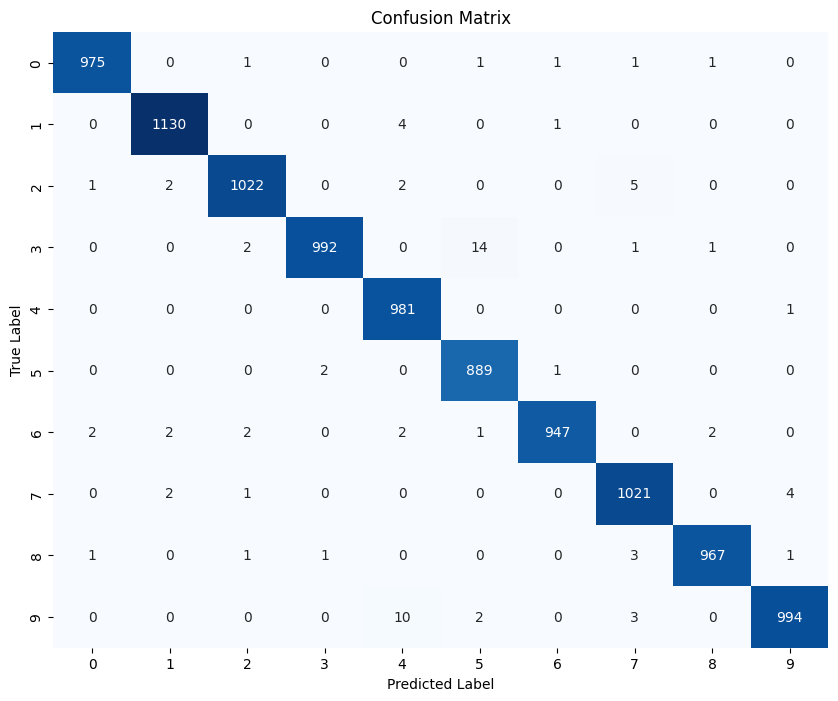


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [26]:
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('\nClassification Report:\n', classification_report(true_labels, predicted_labels))

#### Now, let's take a look at some random sampels of predicted test data and their result

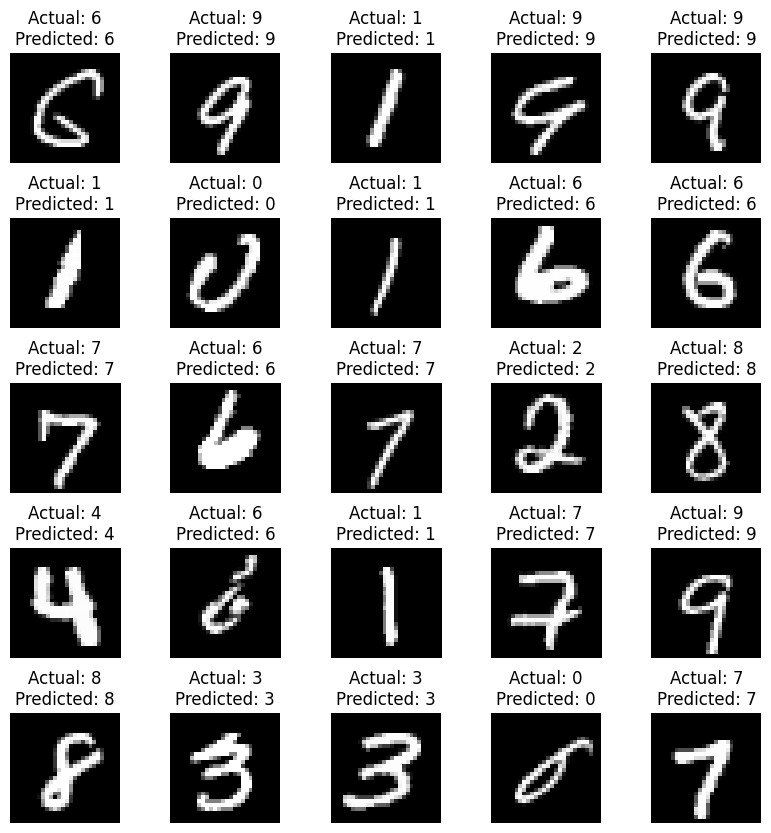

In [27]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

for i in range(25):
    random_index = random.randint(0, test_images.shape[0] - 1)

    # Display the test image
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[random_index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {np.argmax(test_labels[random_index])}\nPredicted: {predictions[random_index].argmax()}")
    plt.axis('off')

plt.show()


<div style="width: 90%; height: 100px; background-color: #3867d6; border: 3px solid #4b7bec; text-align: center; line-height: 100px; color: #FFFFFF; font-size: 24px; font-weight: bold; border-radius:6px;">
   ␥ With third layer structure we reached 99.4% Accuracy ␥
</div>

Refrences : <br>
   [1]  <a href="https://github.com/choznerol/TensorFlow-LaNet5-implementation">
    Convolutional Neuron Network LeNet-5 implemented by Google TensorFlow
        </a>
        <br>
   [2]  <a href="https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342">Understanding and Implementing LeNet-5 CNN Architecture (Deep Learning)</a>
   <br>
   [3]  <a href="https://www.tensorflow.org/tutorials/images/cnn">Convolutional Neural Network (CNN) in TensorFlow documents</a>
   

<div style="width: 90%; height: 100px; background-color: #3867d6; border: 3px solid #4b7bec; text-align: center; line-height: 100px; color: #FFFFFF; font-size: 24px; font-weight: bold; border-radius:6px;">
   Thanks for paying attention to this notebook 🤍
</div>